In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,export_graphviz
import graphviz
%matplotlib inline

Text(0, 0.5, 'Y')

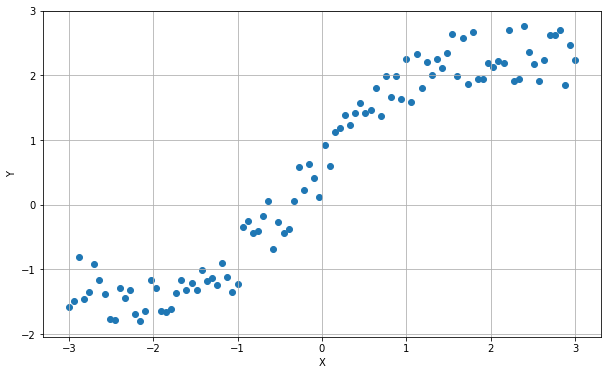

In [32]:
X = np.linspace(-3,3,100)
Y = X / 2 + np.sin(X) + np.random.rand(100)
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")

In [69]:
np.random.seed(10)
per = np.random.permutation(100)
X_mod = X[per]
Y_mod = Y[per]
X_train = X_mod[:70]
y_train = Y_mod[:70]
X_validation = X_mod[70:85]
y_validation = Y_mod[70:85]
X_test = X_mod[85:]
y_test = Y_mod[85:]

In [70]:
print("Shape of X_train := ",X_train.shape)
print("Shape of y_train := ",y_train.shape)
print("Shape of X_validation := ",X_validation.shape)
print("Shape of y_validation := ",y_validation.shape)
print("Shape of X_test := ",X_test.shape)
print("Shape of y_test := ",y_test.shape)

Shape of X_train :=  (70,)
Shape of y_train :=  (70,)
Shape of X_validation :=  (15,)
Shape of y_validation :=  (15,)
Shape of X_test :=  (15,)
Shape of y_test :=  (15,)


In [72]:
X_train = X_train.reshape(X_train.shape[0],1)
y_train = y_train.reshape(y_train.shape[0],1)
X_validation = X_validation.reshape(X_validation.shape[0],1)
y_validation = y_validation.reshape(y_validation.shape[0],1)
X_test = X_test.reshape(X_test.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [73]:
print("Shape of X_train := ",X_train.shape)
print("Shape of y_train := ",y_train.shape)
print("Shape of X_validation := ",X_validation.shape)
print("Shape of y_validation := ",y_validation.shape)
print("Shape of X_test := ",X_test.shape)
print("Shape of y_test := ",y_test.shape)

Shape of X_train :=  (70, 1)
Shape of y_train :=  (70, 1)
Shape of X_validation :=  (15, 1)
Shape of y_validation :=  (15, 1)
Shape of X_test :=  (15, 1)
Shape of y_test :=  (15, 1)


In [74]:
lmodel = LinearRegression()
lmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
print("Co-efficient := ",lmodel.coef_[0,0])
print("Intercept :=    ",lmodel.intercept_[0])

Co-efficient :=  0.8078833756001468
Intercept :=     0.5261223445362486


Text(0, 0.5, 'Y')

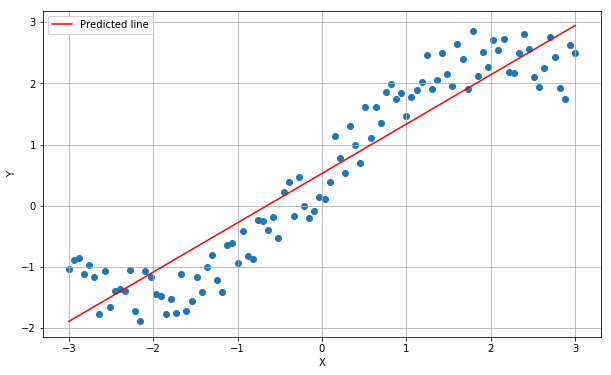

In [79]:
X = np.linspace(-3,3,100)
Y = X / 2 + np.sin(X) + np.random.rand(100)
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.plot(X,(X*lmodel.coef_[0,0]) + lmodel.intercept_[0],'r',label="Predicted line")
plt.grid(True)
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

In [83]:
train_error = np.mean((lmodel.predict(X_train)-y_train) ** 2)
valid_error = np.mean((lmodel.predict(X_validation)-y_validation) ** 2)

print("train_error := ",train_error)
print("valid_error := ",valid_error)

train_error :=  0.2466805457834
valid_error :=  0.2916646050954217


Shape of X_train :=  (1400, 1)
Shape of y_train :=  (1400, 1)
Shape of X_validation :=  (300, 1)
Shape of y_validation :=  (300, 1)
Shape of X_test :=  (300, 1)
Shape of y_test :=  (300, 1)
Co-efficient :=  0.4998783336489225
Intercept :=     0.5118871169602126
train_error :=  0.5715656636459997
valid_error :=  0.5602569109123021


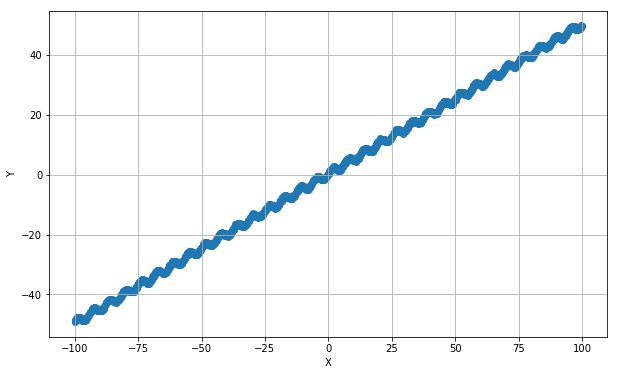

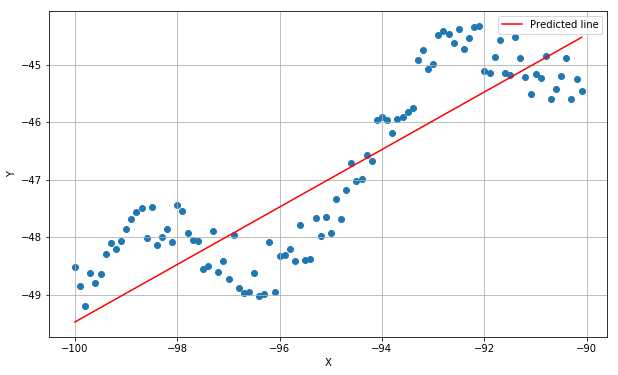

In [89]:
X = np.linspace(-100,100,2000)
Y = X / 2 + np.sin(X) + np.random.rand(2000)
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot()
time.sleep(2)

np.random.seed(10)
per = np.random.permutation(2000)
X_mod = X[per]
Y_mod = Y[per]
X_train = X_mod[:1400]
y_train = Y_mod[:1400]
X_validation = X_mod[1400:1700]
y_validation = Y_mod[1400:1700]
X_test = X_mod[1700:]
y_test = Y_mod[1700:]

X_train = X_train.reshape(X_train.shape[0],1)
y_train = y_train.reshape(y_train.shape[0],1)
X_validation = X_validation.reshape(X_validation.shape[0],1)
y_validation = y_validation.reshape(y_validation.shape[0],1)
X_test = X_test.reshape(X_test.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

print("Shape of X_train := ",X_train.shape)
print("Shape of y_train := ",y_train.shape)
print("Shape of X_validation := ",X_validation.shape)
print("Shape of y_validation := ",y_validation.shape)
print("Shape of X_test := ",X_test.shape)
print("Shape of y_test := ",y_test.shape)
time.sleep(2)

lmodel2 = LinearRegression()
lmodel2.fit(X_train,y_train)

print("Co-efficient := ",lmodel2.coef_[0,0])
print("Intercept :=    ",lmodel2.intercept_[0])
time.sleep(2)


plt.figure(figsize=(10,6))
plt.scatter(X[:100],Y[:100])
plt.plot(X[:100],(X[:100]*lmodel2.coef_[0,0]) + lmodel2.intercept_[0],'r',label="Predicted line")
plt.grid(True)
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
time.sleep(2)

train_error = np.mean((lmodel2.predict(X_train)-y_train) ** 2)
valid_error = np.mean((lmodel2.predict(X_validation)-y_validation) ** 2)

print("train_error := ",train_error)
print("valid_error := ",valid_error)

In [136]:
acc_train = []
acc_test = []
acc_validation = []
models = {}

max_depth = 20
for i in range(1,max_depth+1):
    treemodel = DecisionTreeRegressor(max_depth=i)
    treemodel.fit(X_train,y_train)
    models['Tmodel'+str(i)] = treemodel
    
    acc_train.append(treemodel.score(X_train,y_train))
    acc_validation.append(treemodel.score(X_validation,y_validation))
    acc_test.append(treemodel.score(X_test,y_test))

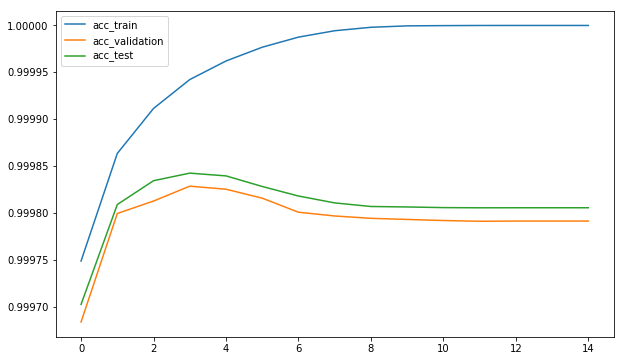

In [166]:
plt.figure(figsize=(10,6))
plt.plot(acc_train[5:],label="acc_train")
plt.plot(acc_validation[5:],label="acc_validation")
plt.plot(acc_test[5:],label="acc_test")
plt.legend()

In [157]:
train_loss = []
test_loss  = []
validation_loss = []

for i in models:
    print("MSE for Training   data := ",np.mean((models[i].predict(X_train) - y_train.reshape(y_train.shape[0])) ** 2))
    print("MSE for Validation data := ",np.mean((models[i].predict(X_validation) - y_validation.reshape(y_validation.shape[0])) ** 2))
    print("MSE for Testing    data := ",np.mean((models[i].predict(X_test) - y_test.reshape(y_test.shape[0])) ** 2))
    print("======================")
    train_loss.append(np.mean((models[i].predict(X_train) - y_train.reshape(y_train.shape[0])) ** 2))
    validation_loss.append(np.mean((models[i].predict(X_validation) - y_validation.reshape(y_validation.shape[0])) ** 2))
    test_loss.append(np.mean((models[i].predict(X_test) - y_test.reshape(y_test.shape[0])) ** 2))

MSE for Training   data :=  211.13962191328744
MSE for Validation data :=  206.69473897575327
MSE for Testing    data :=  196.79920934159716
MSE for Training   data :=  50.84868283158641
MSE for Validation data :=  52.491367103862345
MSE for Testing    data :=  55.656672715681744
MSE for Training   data :=  12.481344859139666
MSE for Validation data :=  13.023934059638869
MSE for Testing    data :=  13.049831300602742
MSE for Training   data :=  2.834560603894709
MSE for Validation data :=  2.8604940740140874
MSE for Testing    data :=  3.0487579090786077
MSE for Training   data :=  0.3927852672053326
MSE for Validation data :=  0.4204028807567796
MSE for Testing    data :=  0.3943496319305092
MSE for Training   data :=  0.20667233319338948
MSE for Validation data :=  0.27465344282791443
MSE for Testing    data :=  0.2502930358907581
MSE for Training   data :=  0.11228682720699096
MSE for Validation data :=  0.17416861921056206
MSE for Testing    data :=  0.16068032390160222
MSE for Tr

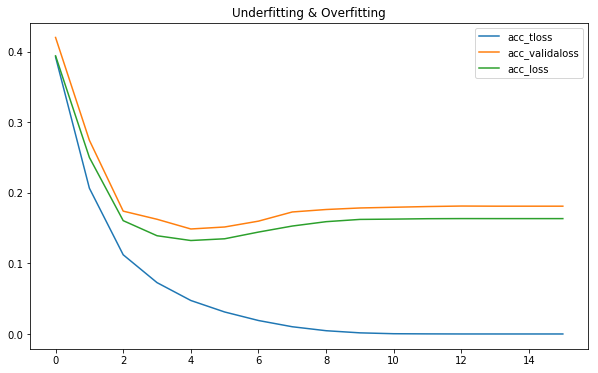

In [163]:
plt.figure(figsize=(10,6))
plt.plot(train_loss[4:],label="acc_tloss")
plt.plot(validation_loss[4:],label="acc_validaloss")
plt.plot(test_loss[4:],label="acc_loss")
plt.title("Underfitting & Overfitting")
plt.legend()

In [141]:
models['Tmodel20'].predict(X_train[100:101])

array([46.32136631])